In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('email.csv')
df.sample(6)

,Category,Message
446,ham,"Sorry, my battery died, I can come by but I'm ..."
3667,ham,I'm turning off my phone. My moms telling ever...
4834,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."
4139,ham,"Good! No, don‘t need any receipts—well done! (..."
3987,ham,"Friendship is not a game to play, It is not a ..."
3700,ham,How i noe... Did ü specify da domain as nusstu...


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 1.Understanding the data

In [4]:
df.shape

(5573, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


# 1. Data Cleaning

In [7]:
df.nunique()

Category       3
Message     5158
dtype: int64

In [8]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [9]:
df[df['Category']=='{"mode":"full"']

,Category,Message
5572,"{""mode"":""full""",isActive:false}


In [10]:
# In category column "ham" means the email is not a spam and "spam" means the email is spam.
# Since the Category column consist of a Unnecessary value i.e {"mode":"full" so we remove it

In [11]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [12]:
df=df[df['Category']!='{"mode":"full"']

In [13]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
df.shape

(5572, 2)

### a. Checking for null values

In [15]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [16]:
df['Message'].value_counts()

Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.      

### b. Checking for Duplicate values

In [17]:
df['Message'].duplicated().sum()

415

In [18]:
df=df.drop_duplicates(subset=['Message'])

In [19]:
df['Message'].duplicated().sum()

0

In [20]:
df.shape

(5157, 2)

### Label encoding the "Category" column

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])

In [22]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA

###  PERCENTAGE OF ham(0) and spam(1)

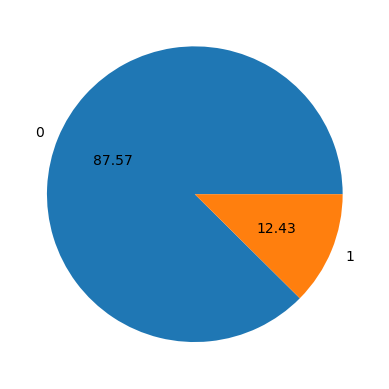

In [23]:
index=df['Category'].value_counts().index
values=df['Category'].value_counts().values
plt.pie(x=values,labels=index,autopct = '%.2f')
plt.show()

In [24]:
# Note : The data set is imbalanced because one class(ham) has significantly more samples than the other class(spam).

### Number of alphabets, sentence ,words are being used in the email

In [25]:
import nltk

In [26]:
nltk.download('punkt')  ## downloading the dependencies

[nltk_data] Downloading package punkt to C:\Users\Prabal
[nltk_data]     Kuinkel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# Finding the number of characters in each email
def character_length(obj):
    return len(obj)

df['num_characters']=df['Message'].apply(character_length)

In [28]:
# Finding the number of words in each email (using nltk wordtokenizer)
def words(obj):
    l=nltk.word_tokenize(obj)
    return (len(l))

df['num_words']=df['Message'].apply(words)


In [29]:
# Finding the number of sentences in each email (using nltk sentencetokenizer)
def sentence(obj):
    l=nltk.sent_tokenize(obj)
    return (len(l))

df['num_sentence']=df['Message'].apply(sentence)

In [30]:
df.sample(5)

,Category,Message,num_characters,num_words,num_sentence
145,0,Yes see ya not on the dot,25,7,1
3523,0,Im sorry bout last nite it wasnt ur fault it ...,114,28,3
1697,0,"Sorry man, my stash ran dry last night and I c...",76,18,1
1412,0,somewhere out there beneath the pale moon ligh...,144,28,1
4565,0,Tell me again what your address is,34,7,1


In [31]:
df.describe()

,Category,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [32]:
# Analyzing the "ham" datas
df[df['Category']==0].describe()

,Category,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869353,17.267715,1.827724
std,0.0,56.708301,13.588065,1.394338
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [33]:
# Observation: The mean number of characters , words and sentence for ham message is: 68,17,2

In [34]:
# Analyzing the "spam" datas
df[df['Category']==1].describe()

,Category,num_characters,num_words,num_sentence
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.970359
std,0.0,30.399707,7.103501,1.485575
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


In [35]:
# Observation: The mean number of characters , words and sentence for spam message is: 131,27,3

In [36]:
# Note 1: we can observe that spam messgae are longer than ham messages

<Axes: xlabel='num_characters', ylabel='Count'>

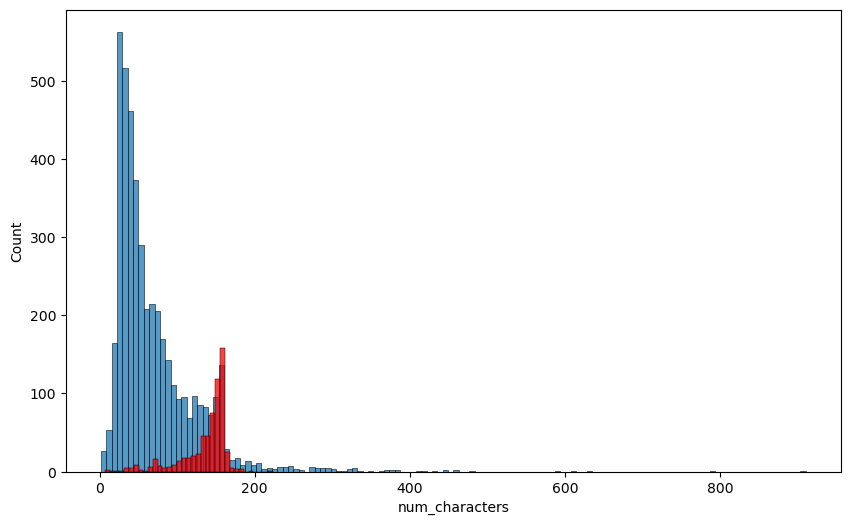

In [37]:
# Similarily we can observe the same above (the number of characters in ham and spam using histogram)
plt.figure(figsize=(10,6))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')
# The number of characters being used in spam is more than in ham

In [38]:
df[['num_characters','num_words','num_sentence']].corr()

,num_characters,num_words,num_sentence
num_characters,1.000000,0.966155,0.622428
num_words,0.966155,1.000000,0.679396
num_sentence,0.622428,0.679396,1.000000


# 3. Data Preprocessing 
## a.lowercase
## b.Tokenization
## c.Removing Special Characters and punctuation
## d.Removing stop words 
## e.Stemming

### a. Lower case

In [39]:
def lowercase(obj):
    return obj.lower()

In [40]:
df['Message']=df['Message'].apply(lowercase)

In [41]:
df

,Category,Message,num_characters,num_words,num_sentence
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,will ü b going to esplanade fr home?,36,9,1
5569,0,"pity, * was in mood for that. so...any other s...",57,15,2
5570,0,the guy did some bitching but i acted like i'd...,125,27,1


### Stemming the data 

In [42]:
from nltk.stem import PorterStemmer

In [43]:
ps= PorterStemmer()

In [44]:
def steamming(obj):
    l=[]
    for i in obj.split(" "):  # to convert the string to list so that steaing can be done to each word
        l.append(ps.stem(i))  # applying steaming to each word 
        
    return (" ".join(l)) # after steaming returning the list as string 
        
   
    

In [45]:
df['Message']=df['Message'].apply(steamming)

In [46]:
df

,Category,Message,num_characters,num_words,num_sentence
0,0,"go until jurong point, crazy.. avail onli in b...",111,24,2
1,0,ok lar... joke wif u oni...,29,8,2
2,1,free entri in 2 a wkli comp to win fa cup fina...,155,37,2
3,0,u dun say so earli hor... u c alreadi then say...,49,13,1
4,0,"nah i don't think he goe to usf, he live aroun...",61,15,1
...,...,...,...,...,...
5567,1,thi is the 2nd time we have tri 2 contact u. u...,160,35,4
5568,0,will ü b go to esplanad fr home?,36,9,1
5569,0,"pity, * wa in mood for that. so...ani other su...",57,15,2
5570,0,the guy did some bitch but i act like i'd be i...,125,27,1


### c. Removing Special Characters and punctuations
(i.e keeping alphabetic and alphanumerical characters and discarding other characters)

In [47]:
# import string
# def checkalphanumeric(obj):
#     l1=obj.split(' ')
#     l=[]
#     for i in l1:
#         for j in i:
#             if j.isalnum():
#                 l.append(j)
#         l.append(" ")
        
#     return ("".join(l))
                
# # df['Message']=df['Message'].apply(checkalphanumeric)
# checkalphanumeric("hello k xa ,hau %%")


In [48]:
def checkalphanumeric(obj):
    l = []
    for char in obj:  # To iterate over each character of the string 
        if char.isalnum() or char.isspace(): # if the character is alpha numeric and space then add it to the list other wise discard it
            l.append(char)
    return "".join(l)  #converting the list back to the string
                
df['Message']=df['Message'].apply(checkalphanumeric)


In [49]:
df


,Category,Message,num_characters,num_words,num_sentence
0,0,go until jurong point crazy avail onli in bugi...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri in 2 a wkli comp to win fa cup fina...,155,37,2
3,0,u dun say so earli hor u c alreadi then say,49,13,1
4,0,nah i dont think he goe to usf he live around ...,61,15,1
...,...,...,...,...,...
5567,1,thi is the 2nd time we have tri 2 contact u u ...,160,35,4
5568,0,will ü b go to esplanad fr home,36,9,1
5569,0,pity wa in mood for that soani other suggestions,57,15,2
5570,0,the guy did some bitch but i act like id be in...,125,27,1


# Creating  Word cloud for ham and spam 
A word cloud is a data visualization technique used to represent text data in which the size of each word indicates 
its frequency or importance. In a word cloud, words are arranged in random order, with more frequent words typically 
appearing larger and closer to the center of the cloud.

### word colud for spam

In [139]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=550,stopwords=None,max_words=30)


In [129]:
df[df['Category']==0]['Message'].str.cat(sep=" ")

'go until jurong point crazy avail onli in bugi n great world la e buffet cine there got amor wat ok lar joke wif u oni u dun say so earli hor u c alreadi then say nah i dont think he goe to usf he live around here though even my brother is not like to speak with me they treat me like aid patent as per your request mell mell oru minnaminungint nurungu vettam ha been set as your callertun for all callers press 9 to copi your friend callertun im gonna be home soon and i dont want to talk about thi stuff anymor tonight k iv cri enough today iv been search for the right word to thank you for thi breather i promis i wont take your help for grant and will fulfil my promise you have been wonder and a bless at all times i have a date on sunday with will oh kim watch here eh u rememb how 2 spell hi name ye i did he v naughti make until i v wet fine if that the way u feel that the way it gota b is that serious how you spell hi name im go to tri for 2 month ha ha onli joke so ü pay first lar then

In [130]:
# Since the input for the word cloud must be a string ..so we convert the df['Category'] column for spam(i.e 1 ) to string
string=df[df['Category']==1]['Message'].str.cat(sep=' ')

# .str.cat(sep=' '):

#     The .str.cat() method concatenates the strings in the selected column into a single string.

#     sep=' ' specifies that a space should be used to separate the concatenated strings from each row.

In [135]:
spam_wc=wc.generate(string)

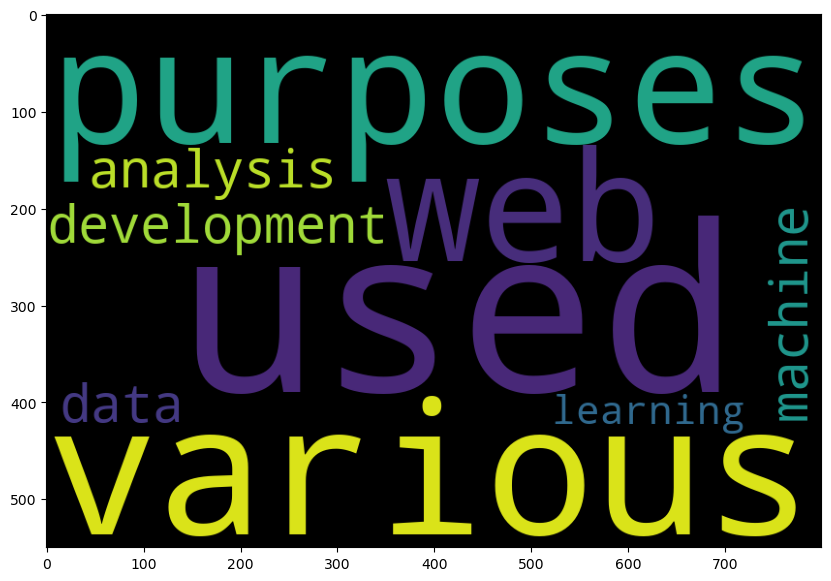

In [141]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [54]:
### word cloud for ham message

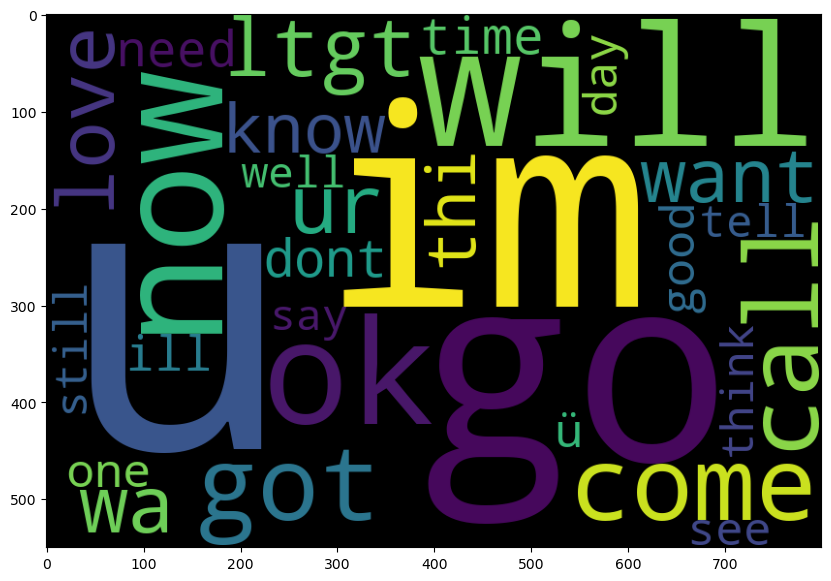

In [137]:
ham_wc=wc.generate(df[df['Category']==0]['Message'].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

# Text vectorization Applying the TFIDF 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [58]:
len(df['Message'])

5157

In [59]:
vc = TfidfVectorizer(stop_words='english',max_features=10000)

In [60]:
x=vc.fit_transform(df['Message']).toarray()

In [61]:
y=df['Category']

In [143]:
x.shape

(5157, 8745)

In [63]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

# Train_test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [66]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
y_train

2792    0
757     0
1929    1
5399    0
4502    0
       ..
4750    0
474     1
3273    0
4022    0
882     0
Name: Category, Length: 4641, dtype: int32

In [69]:
y_test

3031    0
495     0
2942    0
3911    0
3360    1
       ..
1941    0
3688    0
2361    0
4874    0
3617    0
Name: Category, Length: 516, dtype: int32

# Training the model using logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_predict_lr=lr.predict(x_test)
y_predict_lr

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Training the model using Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [74]:
y_predict_mnb=mnb.predict(x_test)
y_predict_mnb

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Checking the Accuracy,precision and Confusion matrix of the model

In [75]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix


In [76]:
print('Logistic Regression \n')
acc_score_lr = accuracy_score(y_test,y_predict_lr)
pre_score_lr = precision_score(y_test,y_predict_lr)
con_matrix_lr = confusion_matrix(y_test,y_predict_lr)

print("Accuracy : ",acc_score_lr*100)
print('Precision : ',pre_score_lr*100)
print("Confusion Matrix : \n",con_matrix_lr)

Logistic Regression 

Accuracy :  94.76744186046511
Precision :  100.0
Confusion Matrix : 
 [[447   0]
 [ 27  42]]


In [77]:
print('Multinominal Naive Bayes \n')
acc_score_mnb = accuracy_score(y_test,y_predict_mnb)
pre_score_mnb = precision_score(y_test,y_predict_mnb)
con_matrix_mnb = confusion_matrix(y_test,y_predict_mnb)

print("Accuracy : ",round(acc_score_mnb*100,2))
print('Precision : ',pre_score_mnb*100)
print("Confusion Matrix : \n",con_matrix_mnb)

Multinominal Naive Bayes 

Accuracy :  95.54
Precision :  100.0
Confusion Matrix : 
 [[447   0]
 [ 23  46]]


In [78]:
def test(str):
    arr=vc.transform([str]).toarray()
    return arr

str = "You have a potential match! Matches are based on your activity with data analyst roles. Spokestack Spokestack Data Analyst Singapore Company Description: Pylon.AI is a start-up data analytics company in Singapore providing data integrated services and IoT (Internet of Things) solutions for the Built Environment sector. We are de... See more details. Average base salary estimate. Estimate provided by employer: $3,000-$6,000/mo (est.). Quick facts: Job Type: Full time. Size: 1 to 50 employees. Company type: Company - Private. See more details. This message was sent to prabalkuinkel10@gmail.com. Privacy Policy. Manage Settings. Unsubscribe. Glassdoor. 300 Mission Street, 16th Floor, San Francisco, CA 94105, USA. Copyright © 2008-2024, Glassdoor LLC. Glassdoor and logo are registered trademarks of Glassdoor LLC.mobil,txt,free,repli,offer ,send"

arr=test(str)
print(arr)

[[0. 0. 0. ... 0. 0. 0.]]


In [79]:
# 0 is ham and 1 is spam
print('Prediction using Logistic Regression: ')
print(lr.predict(arr),"\n\n")

print('Prediction using Multinominal Naive Bayes: ')
print(mnb.predict(arr))

Prediction using Logistic Regression: 
[0] 


Prediction using Multinominal Naive Bayes: 
[0]


In [80]:
# Best is of MNB
